In [22]:
pip install keras-layer-normalization

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import pickle
import seaborn as sns
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model




In [24]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
!pip install opencv-python

## Read dataset and convert into images and labels

In [ ]:
DIRECTORY = r'C:\Users\Saanvi Tayal\OneDrive\Documents\Visual Studio 2019\OilSpillCNN\Oil spill'
CATEGORIES = ['no oil spill', 'oil spill']

In [ ]:
data = []

for category in CATEGORIES:
    path = os.path.join(DIRECTORY, category)
    for img in os.listdir(path):
        img_path = os.path.join(path, img)
        label = CATEGORIES.index(category)
        try:
          arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
          new_arr = cv2.resize(arr, (60, 60))
          data.append([new_arr, label])
        except:
          break

In [ ]:
len(data)

67

In [ ]:
random.shuffle(data)

In [26]:
X = []
y = []
for features, label in data:
    X.append(features)
    y.append(label)

In [27]:
X = np.array(X)
y = np.array(y)

In [28]:
X

array([[[ 80,  68,  68, ..., 194, 214, 235],
        [ 64,  52,  88, ..., 192, 249, 221],
        [ 59,  73,  61, ..., 235, 220, 227],
        ...,
        [ 58,  60,  69, ..., 163, 174, 210],
        [ 55,  56,  58, ..., 167, 148, 216],
        [ 58,  62,  57, ..., 173, 194, 238]],

       [[255, 255, 255, ..., 255, 255, 255],
        [245,  21,  49, ...,   4,  21, 252],
        [245,  50,  45, ...,  11,  39, 252],
        ...,
        [245,  23,  34, ..., 205, 196, 255],
        [253, 225, 223, ..., 250, 248, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[125, 100,  76, ...,  70,  87,  77],
        [ 71, 100,  78, ..., 145,  91,  90],
        [128,  86,  62, ...,  93,  70,  74],
        ...,
        [163, 157, 160, ..., 161, 142, 143],
        [161, 155, 158, ..., 190, 162, 156],
        [170, 169, 172, ..., 177, 186, 185]],

       ...,

       [[171, 148, 119, ..., 123, 133, 121],
        [170, 150, 100, ..., 119, 136, 125],
        [143, 148, 138, ..., 125, 139, 140

In [29]:
pickle.dump(X, open('X.pkl', 'wb'))
pickle.dump(y, open('y.pkl', 'wb'))

## Exploratory Data Analysis

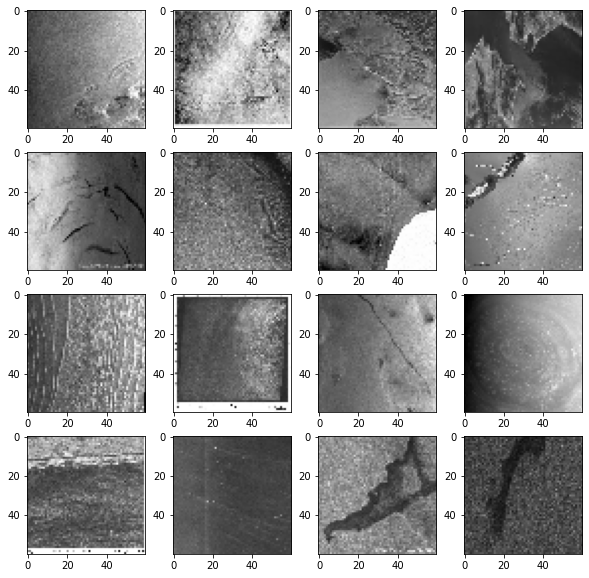

In [30]:
# to display grid of images
rows = 4
cols = 4
axes = []

fig = plt.figure(figsize=(10,10))
for i in range(rows * cols):
    axes.append( fig.add_subplot(rows, cols, i+1) )
    plt.imshow(cv2.cvtColor(X[i], cv2.COLOR_BGR2RGB))

c:\Users\Saanvi Tayal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

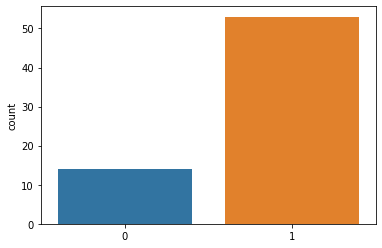

In [31]:
sns.countplot(y)

## Scaling images from (0 - 255) to (0-1) 

In [32]:
X = X/255

In [33]:
X

array([[[0.31372549, 0.26666667, 0.26666667, ..., 0.76078431,
         0.83921569, 0.92156863],
        [0.25098039, 0.20392157, 0.34509804, ..., 0.75294118,
         0.97647059, 0.86666667],
        [0.23137255, 0.28627451, 0.23921569, ..., 0.92156863,
         0.8627451 , 0.89019608],
        ...,
        [0.22745098, 0.23529412, 0.27058824, ..., 0.63921569,
         0.68235294, 0.82352941],
        [0.21568627, 0.21960784, 0.22745098, ..., 0.65490196,
         0.58039216, 0.84705882],
        [0.22745098, 0.24313725, 0.22352941, ..., 0.67843137,
         0.76078431, 0.93333333]],

       [[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [0.96078431, 0.08235294, 0.19215686, ..., 0.01568627,
         0.08235294, 0.98823529],
        [0.96078431, 0.19607843, 0.17647059, ..., 0.04313725,
         0.15294118, 0.98823529],
        ...,
        [0.96078431, 0.09019608, 0.13333333, ..., 0.80392157,
         0.76862745, 1.        ],
        [0.9

## Use of appropriate shape as input

In [34]:
X.shape

(67, 60, 60)

In [35]:
X = X.reshape(-1, 60, 60, 1)

In [36]:
X.shape

(67, 60, 60, 1)

In [37]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


In [38]:
datagen.flow(X, y, batch_size=32)

## Model Building

In [39]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [40]:
model = Sequential()

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, input_shape = X.shape[1:], activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))

In [41]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Model Training

In [42]:
history = model.fit(X, y, epochs=20, validation_split=0.2)

Epoch 1/20
2/2 [==============================] - 1s 255ms/step - loss: 0.7004 - accuracy: 0.6981 - val_loss: 0.2566 - val_accuracy: 1.0000
Epoch 2/20
2/2 [==============================] - 0s 95ms/step - loss: 0.5829 - accuracy: 0.7358 - val_loss: 0.3785 - val_accuracy: 1.0000
Epoch 3/20
2/2 [==============================] - 0s 90ms/step - loss: 0.5736 - accuracy: 0.7358 - val_loss: 0.2665 - val_accuracy: 1.0000
Epoch 4/20
2/2 [==============================] - 0s 95ms/step - loss: 0.5907 - accuracy: 0.7358 - val_loss: 0.2019 - val_accuracy: 1.0000
Epoch 5/20
2/2 [==============================] - 0s 99ms/step - loss: 0.5471 - accuracy: 0.7358 - val_loss: 0.3357 - val_accuracy: 1.0000
Epoch 6/20
2/2 [==============================] - 0s 114ms/step - loss: 0.5019 - accuracy: 0.7358 - val_loss: 0.2509 - val_accuracy: 1.0000
Epoch 7/20
2/2 [==============================] - 0s 115ms/step - loss: 0.4592 - accuracy: 0.7547 - val_loss: 0.1906 - val_accuracy: 1.0000
Epoch 8/20
2/2 [========

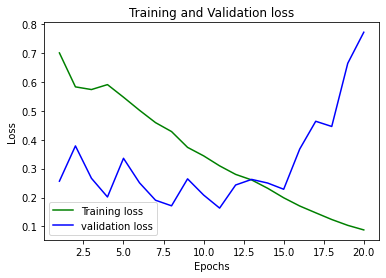

In [43]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model.save("model-0.52.hdf5")

## Use Model on test image

In [45]:
def image(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(img, (60, 60))
    new_arr = np.array(new_arr)
    new_arr = new_arr.reshape(-1, 60, 60, 1)
    return new_arr

In [46]:
prediction = model.predict([image('C:/Users/Saanvi Tayal/OneDrive/Documents/SAANVI TAYAL/Oil Spill CNN/Oil spill/oil spill/oil_spill_8.jpg')])
print(CATEGORIES[prediction.argmax()])

error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
